In [1]:
# Step 1: Load and preview the data
import pandas as pd

import os  ## for Silencing the warnings that may appear in the code, these warnings don't means that the code doesn't works.
os.environ['OMP_NUM_THREADS'] = '1'


df = pd.read_csv("mall_customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Step 2: Understand structure
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [3]:
# Step 3: Clean column names
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]
df.rename(columns={
    'genre': 'gender',
    'annual_income_(k$)': 'income',
    'spending_score_(1-100)': 'score'
}, inplace=True)

In [4]:
# Step 4: Visualize features
import seaborn as sns
import matplotlib.pyplot as plt

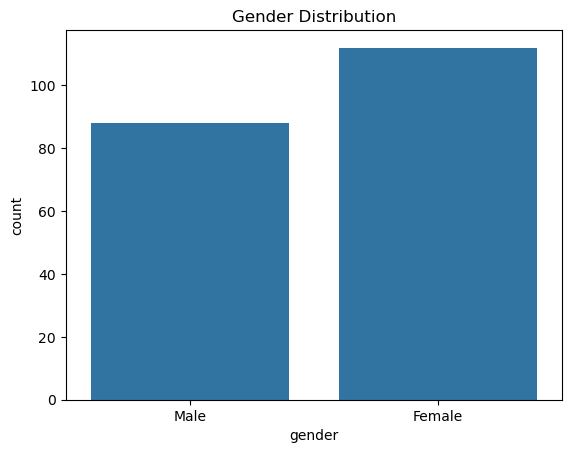

In [5]:
# Gender distribution   ##(Countplot using gender)

sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.show()


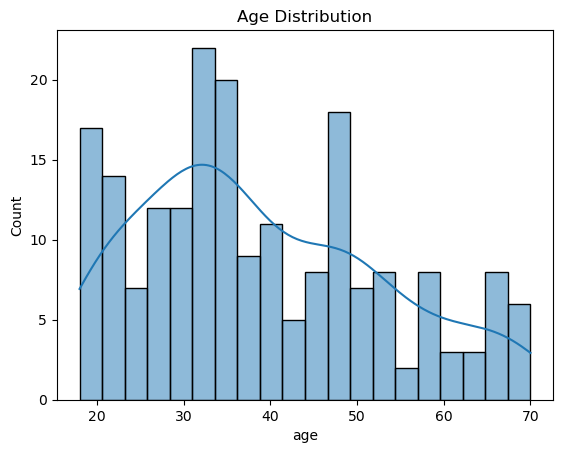

In [6]:
# Age distribution using(Histogram)
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

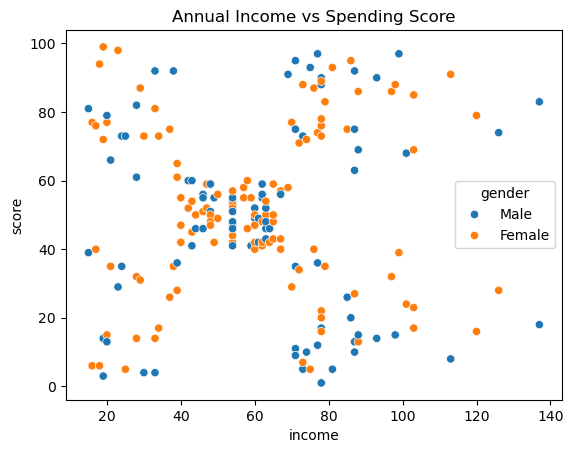

In [7]:
# Income vs Score using Scatterplot
sns.scatterplot(data=df, x='income', y='score', hue='gender')
plt.title("Annual Income vs Spending Score")
plt.show()

In [8]:
##Customer Segmentation Using K-Means Clustering

In [9]:
from sklearn.cluster import KMeans


In [13]:
X = df[['income', 'score']]

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X)


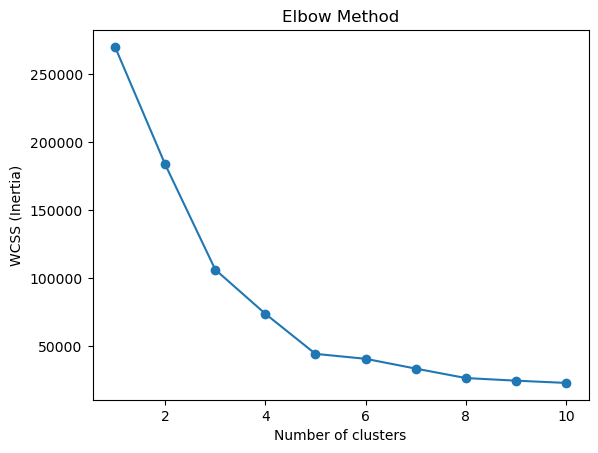

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Inertia)")
plt.show()


In [15]:
## Lets start visualizing the clusters

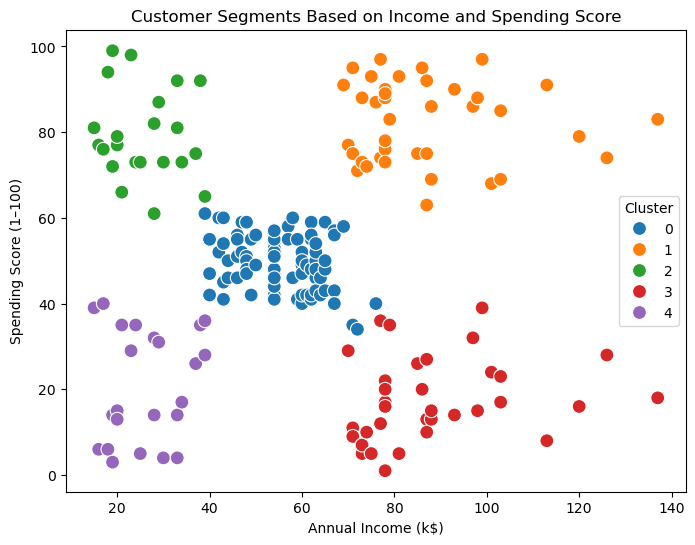

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='income', y='score', hue='cluster', palette='tab10', s=100)
plt.title("Customer Segments Based on Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend(title='Cluster')
plt.show()


In [ ]:
## Dimensionality Reduction for Visualization (PCA or t-SNE)

In [17]:
from sklearn.decomposition import PCA

# We only use the clustering features
X = df[['income', 'score']]

# Reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create a new DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['cluster']


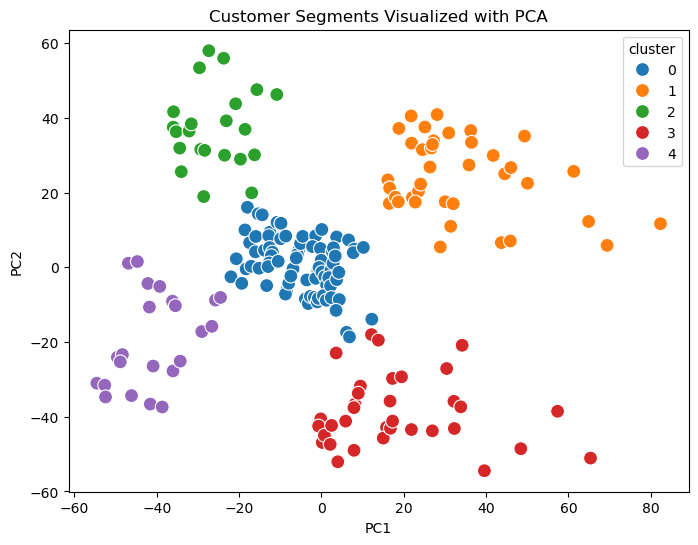

In [19]:
## Plot PCA Result

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=100)
plt.title("Customer Segments Visualized with PCA")
plt.show()


In [20]:
## t-SNE for Cluster Visualization

from sklearn.manifold import TSNE

# Run t-SNE (note: might take a few seconds)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X)

# Create a new DataFrame for plotting
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['cluster'] = df['cluster']


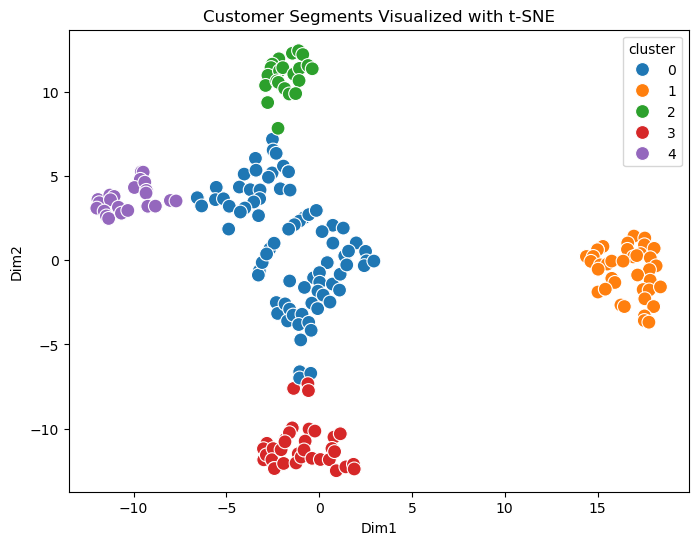

In [21]:
## Plot t-SNE Result

plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='cluster', palette='tab10', s=100)
plt.title("Customer Segments Visualized with t-SNE")
plt.show()


In [24]:
## Suggesting Marketing Strategies
## View Cluster Stats First (Optional but Helpful)

df.groupby('cluster')[['income', 'score']].mean().sort_values('score', ascending=False)


,income,score
cluster,,
1,86.538462,82.128205
2,25.727273,79.363636
0,55.296296,49.518519
4,26.304348,20.913043
3,88.200000,17.114286


## 📢 Marketing Strategies by Customer Segment

**Cluster 0**  
💰 Income: High  
🔥 Spending Score: High  
✅ **Loyal High-Value Customers**  
**Strategy:** Offer exclusive memberships, loyalty rewards, and early access to new products.

---

**Cluster 1**  
💰 Income: High  
📉 Spending Score: Low  
✅ **Cautious Spenders**  
**Strategy:** Personalized offers, free trials, and incentives to activate spending.

---

**Cluster 2**  
💸 Income: Low  
🔥 Spending Score: High  
✅ **Value-Seeking Shoppers**  
**Strategy:** Promote discounts, bundled deals, and referral programs.

---

**Cluster 3**  
💸 Income: Low  
📉 Spending Score: Low  
✅ **Disengaged or Budget-Conscious**  
**Strategy:** Re-engagement campaigns, surveys, and basic loyalty rewards.

---

**Cluster 4**  
💵 Income: Mid  
📊 Spending Score: Mid  
✅ **Average Shoppers**  
**Strategy:** Highlight trending products, upsell smartly, and offer seasonal deals.
